In [24]:
# ============================================================================
# NETFLIX ANALYSIS - DATA CLEANING
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import subprocess
import sys
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

print('All libraries imported!')
print()

All libraries imported!



In [2]:
# ============================================================================
# LOAD DATA
# ============================================================================

df = pd.read_csv('netflix_titles.csv')
print('Original Data')
print('='*70)
print(f"Shape: {df.shape}")
print(f"Total missing values: {df.isnull().sum().sum()}")
print()

#Show missing values breakdown
print('Missing values by column:')
print(df.isnull().sum())
print()

Original Data
Shape: (8807, 12)
Total missing values: 4307

Missing values by column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64



In [3]:
# ============================================================================
# CLEANING PIPELINE
# ============================================================================

# Create clean copy
df_clean = df.copy()

# Step 1: Drop rows with missing critical columns
print('CLEANING STEPS:')
print('='*70)
df_clean = df_clean.dropna(subset = ['rating','duration','date_added'])
print(f" Step1 : Dropped rows with missing rating/duration/date_added")
print(f" Rows now: {len(df_clean):,}")

print()

#Step 2: Fill missing director
df_clean['director'] = df_clean['director'].fillna('Unknown Director')
print(f" Step 2: Filled missing directors with 'Unknown Director'")
print(f" Missing directors now: {df_clean['director'].isnull().sum()}")
print()

#Step 3: Fill missing cast
df_clean['cast'] = df_clean['cast'].fillna('Cast Not Available')
print(f" Step 3: Filled missing cast with 'Cast Not Available'")
print(f" Missing cast now: {df_clean['cast'].isnull().sum()}")
print()


#Step 4: Fill missing country
df_clean['country'] = df_clean['country'].fillna('Country Not Available')
print(f" Step 4: Filled missing country with 'Country Not Available'")
print(f" Missing country now: {df_clean['country'].isnull().sum()}")
print()


# ============================================================================
# FINAL CLEAN DATA
# ============================================================================

print("="*70)
print("CLEANING COMPLETE!")
print("="*70)
print(f"Original: {len(df):,} rows")
print(f"Clean: {len(df_clean):,} rows")
print(f"Rows removed: {len(df) - len(df_clean):,} ({((len(df) - len(df_clean))/len(df)*100):.2f}%)")
print(f"\nRemaining missing values: {df_clean.isnull().sum().sum()}")
print()



CLEANING STEPS:
 Step1 : Dropped rows with missing rating/duration/date_added
 Rows now: 8,790

 Step 2: Filled missing directors with 'Unknown Director'
 Missing directors now: 0

 Step 3: Filled missing cast with 'Cast Not Available'
 Missing cast now: 0

 Step 4: Filled missing country with 'Country Not Available'
 Missing country now: 0

CLEANING COMPLETE!
Original: 8,807 rows
Clean: 8,790 rows
Rows removed: 17 (0.19%)

Remaining missing values: 0



In [4]:
# Show the clean data
print("First 3 rows of clean data:")
print(df_clean.head(3))

First 3 rows of clean data:
  show_id     type                 title          director  \
0      s1    Movie  Dick Johnson Is Dead   Kirsten Johnson   
1      s2  TV Show         Blood & Water  Unknown Director   
2      s3  TV Show             Ganglands   Julien Leclercq   

                                                cast                country  \
0                                 Cast Not Available          United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...           South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  Country Not Available   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime 

In [5]:
# ============================================================================
# EXPLORATORY DATA ANALYSIS - Basic Statistics
# ============================================================================

print("\n" + "="*70)
print("📊 EXPLORATORY DATA ANALYSIS")
print("="*70)

# ============================================================================
# 1. Content Type Distribution
# ============================================================================


print("\n1️⃣ CONTENT TYPE BREAKDOWN")
print("-"*70)

type_counts = df_clean['type'].value_counts()
print(type_counts)
print()

type_percent = (df_clean['type'].value_counts(normalize = True)*100).round(2)
print('As percentages:')
print(type_percent)
print()


📊 EXPLORATORY DATA ANALYSIS

1️⃣ CONTENT TYPE BREAKDOWN
----------------------------------------------------------------------
Movie      6126
TV Show    2664
Name: type, dtype: int64

As percentages:
Movie      69.69
TV Show    30.31
Name: type, dtype: float64



In [6]:
# ============================================================================
# 2. Rating Distribution
# ============================================================================


print('\n Top 10 Ratings')
print('='*70)

rating_counts = df_clean['rating'].value_counts().head(10)
print(rating_counts)

print()


 Top 10 Ratings
TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: rating, dtype: int64



In [7]:
# ============================================================================
# 3. Release Year Analysis
# ============================================================================
print('\n Release Year Statistics')
print('='*70)

print(f"Oldest content: {df_clean['release_year'].min()}")
print(f"Newest content: {df_clean['release_year'].max()}")
print(f"Average release year: {df_clean['release_year'].mean()}")
print(f"Median release year: {df_clean['release_year'].median():.0f}")

print()

print("Average release year by type:")
print(df_clean.groupby('type')['release_year'].mean())
print()


 Release Year Statistics
Oldest content: 1925
Newest content: 2021
Average release year: 2014.183162684869
Median release year: 2017

Average release year by type:
type
Movie      2013.120144
TV Show    2016.627628
Name: release_year, dtype: float64



In [8]:
# ============================================================================
# 4. Top Countries
# ============================================================================
print('\n Top Countries')
print('='*70)


top_countries = df_clean['country'].value_counts().head(10)
print(top_countries)
print()


 Top Countries
United States            2809
India                     972
Country Not Available     829
United Kingdom            418
Japan                     243
South Korea               199
Canada                    181
Spain                     145
France                    124
Mexico                    110
Name: country, dtype: int64



In [9]:
# ============================================================================
# 5. Content Added Over Time
# ============================================================================

print('\n Top Countries')
print('='*70)

df_clean['year_added'] = pd.to_datetime(df_clean['date_added']).dt.year

yearly_additions = df_clean['year_added'].value_counts().sort_index()
print("Content added per year (last 100 years):")
print(yearly_additions.tail(100))

print()


 Top Countries
Content added per year (last 100 years):
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: year_added, dtype: int64



In [10]:

# ============================================================================
# 6. Key Insights Summary
# ============================================================================

print("\n" + "="*70)
print("🎯 KEY INSIGHTS")
print("="*70)

movies_count = len(df_clean[df_clean['type'] == 'Movie'])
tv_count = len(df_clean[df_clean['type'] == 'TV Show'])
movies_pct = (movies_count / len(df_clean) * 100)

print(f"• Netflix has {movies_pct:.1f}% Movies and {100-movies_pct:.1f}% TV Shows")
print(f"• Most common rating: {df_clean['rating'].mode()[0]}")
print(f"• Top producing country: {df_clean['country'].mode()[0]}")
print(f"• Content ranges from {df_clean['release_year'].min()} to {df_clean['release_year'].max()}")
print(f"• Peak year for adding content: {df_clean['year_added'].mode()[0]}")


🎯 KEY INSIGHTS
• Netflix has 69.7% Movies and 30.3% TV Shows
• Most common rating: TV-MA
• Top producing country: United States
• Content ranges from 1925 to 2021
• Peak year for adding content: 2019


In [11]:
# ============================================================================
# VISUALIZATIONS - Creating Insightful Charts
# ============================================================================

#Set up visualization style
plt.style.use('seaborn-darkgrid')
sns.set_palette('husl')

print("\n" + "="*70)
print('CREATING VISUALIZATIONS')
print("\n" + "="*70)

print()


CREATING VISUALIZATIONS




Creating visualizations 1: Content type distribution..
Saved: viz_01_content_type_distribution.png



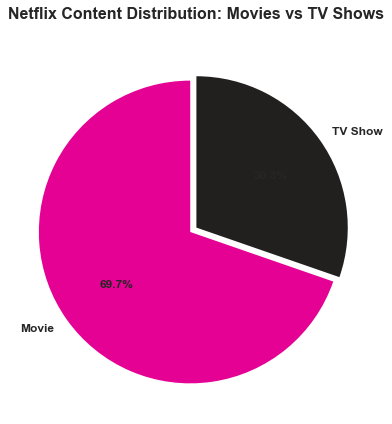

In [12]:
# ============================================================================
# VISUALIZATION 1: Content Type Distribution (Pie Chart)
# ============================================================================

print('Creating visualizations 1: Content type distribution..')
plt.figure(figsize=(10,6))

type_counts = df_clean['type'].value_counts()
colors = ['#E50194','#221f1f']

plt.pie(
    type_counts.values,
    labels = type_counts.index,
    autopct = '%1.1f%%',
    startangle = 90,
    colors = colors,
    explode = (0.05,0),
    textprops = {'fontsize':12, 'weight':'bold'})

plt.title('Netflix Content Distribution: Movies vs TV Shows', 
         fontsize = 16,
         fontweight = 'bold',
         pad = 20)

plt.tight_layout()

plt.savefig('viz_01_content_type_distribution.png', dpi = 300, bbox_inches = 'tight')

print('Saved: viz_01_content_type_distribution.png')
print()

Creating Visualization 2: Top 10 Ratings...


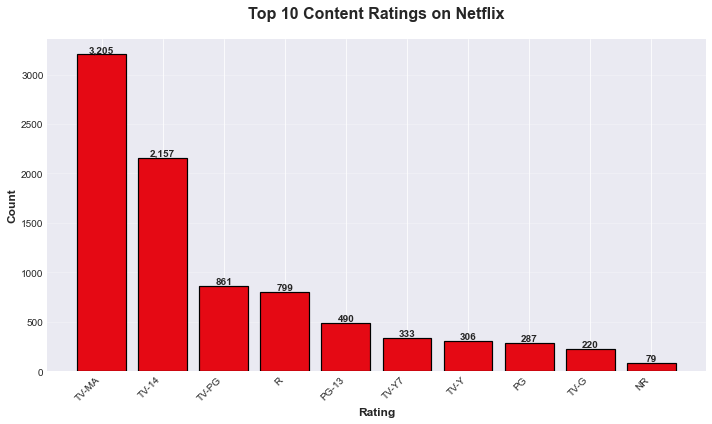

Saved: viz_02_top_ratings.png



In [13]:
# ============================================================================
# VISUALIZATION 2: Top 10 Ratings Distribution (Bar Chart)
# ============================================================================

print('Creating Visualization 2: Top 10 Ratings...')
plt.figure(figsize=(10,6))

top_ratings = df_clean['rating'].value_counts().head(10)
bars = plt.bar(range(len(top_ratings)),
              top_ratings.values,
              color = '#E50914',
              edgecolor = 'black',
              linewidth = 1.2)

plt.xticks(range(len(top_ratings)), top_ratings.index, rotation = 45, ha = 'right')
plt.xlabel('Rating', fontsize = 12, fontweight = 'bold')
plt.ylabel('Count', fontsize = 12, fontweight = 'bold')
plt.title('Top 10 Content Ratings on Netflix', fontsize = 16, fontweight = 'bold', pad = 20)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}',
            ha = 'center', va= 'bottom', fontweight = 'bold')

plt.grid(axis = 'y', alpha = 0.3)
plt.tight_layout()
plt.savefig('viz_02_top_ratings.png', dpi = 300, bbox_inches = 'tight')
plt.show()

print('Saved: viz_02_top_ratings.png')
print()

Creating Visualization 3: Netflix Growth over Time...
Saved: viz_03_content_growth_timeline.png



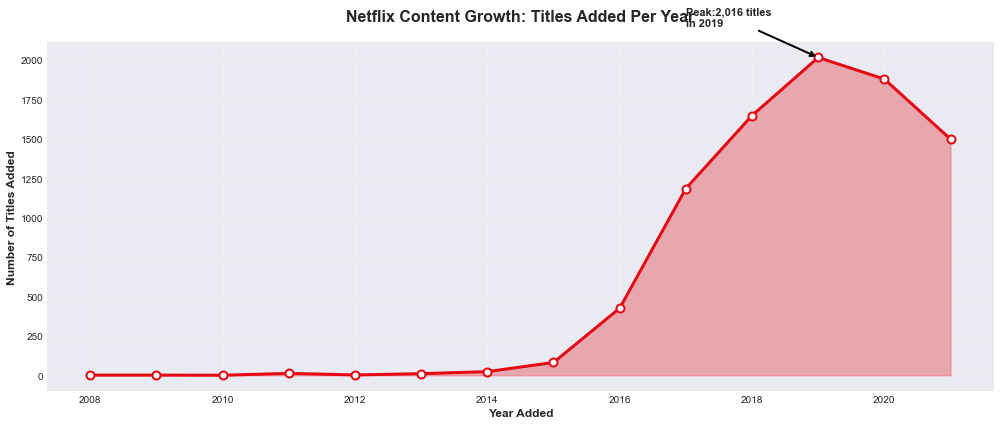

In [14]:
# ============================================================================
# VISUALIZATION 3: Content Added Over Time (Line Chart)
# ============================================================================

print('Creating Visualization 3: Netflix Growth over Time...')
plt.figure(figsize = (14,6))

yearly_content = df_clean['year_added'].value_counts().sort_index()

plt.plot(
    yearly_content.index,
    yearly_content.values,
    marker = 'o',
    linewidth = 3,
    markersize = 8,
    color = '#E50914',
    markerfacecolor = 'white',
    markeredgewidth = 2,
    markeredgecolor = '#E50914')

plt.fill_between(yearly_content.index, yearly_content.values, alpha =0.3, color = '#E50914')

plt.xlabel('Year Added', fontsize = 12, fontweight = 'bold')
plt.ylabel('Number of Titles Added', fontsize = 12, fontweight = 'bold')
plt.title('Netflix Content Growth: Titles Added Per Year', fontsize = 16, fontweight = 'bold', pad = 20)

peak_year = yearly_content.idxmax()
peak_value = yearly_content.max()
plt.annotate(f'Peak:{peak_value:,} titles\nin {peak_year}',
            xy = (peak_year, peak_value),
            xytext = (peak_year-2, peak_value+200),
            fontsize = 11,
            fontweight = 'bold',
            arrowprops = dict(arrowstyle='->', color = 'black', lw = 2))

plt.grid(alpha = 0.3)
plt.tight_layout()
plt.savefig('viz_03_content_growth_timeline.png', dpi=300, bbox_inches='tight')
print('Saved: viz_03_content_growth_timeline.png')
print()

Creating Visualization 4: Top Content Producing Countries...


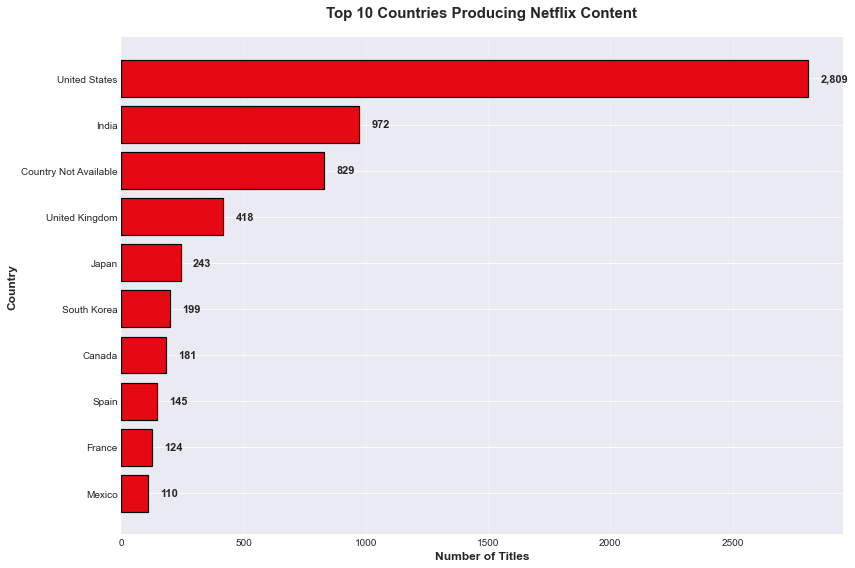

Saved: viz_04_top_countries.png



In [15]:
# ============================================================================
# VISUALIZATION 4: Top 10 Content Producing Countries (Horizontal Bar)
# ============================================================================

print('Creating Visualization 4: Top Content Producing Countries...')

plt.figure(figsize = (12,8))
top_countries = df_clean['country'].value_counts().head(10)

#Create horizontal bar chart
bars = plt.barh(
    range(len(top_countries)),
    top_countries.values,
    color = '#E50914',
    edgecolor = 'black',
    linewidth = 1.2)

plt.yticks(range(len(top_countries)), top_countries.index)
plt.xlabel('Number of Titles', fontsize = 12, fontweight = 'bold')
plt.ylabel('Country', fontsize = 12, fontweight = 'bold')
plt.title('Top 10 Countries Producing Netflix Content', fontsize = 15, fontweight = 'bold', pad = 20)

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2.,
             f'{int(width):,}',
             ha = 'left', va = 'center', fontweight = 'bold', fontsize = 11)

plt.gca().invert_yaxis()
plt.grid(axis = 'x', alpha = 0.3)
plt.tight_layout()
plt.savefig('viz_04_top_countries.png', dpi = 300, bbox_inches = 'tight')
plt.show()

print('Saved: viz_04_top_countries.png')
print()

Creating Visualization 5: Rating Distribution by Type...


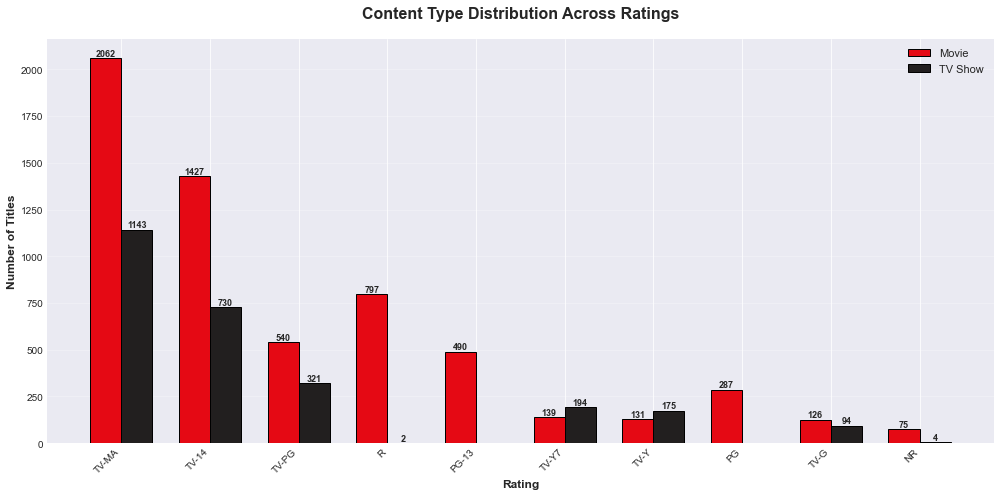

✅ Saved: viz_05_rating_by_type.png



In [16]:
# ============================================================================
# VISUALIZATION 5: Rating Distribution by Content Type (Grouped Bar)
# ============================================================================
print("Creating Visualization 5: Rating Distribution by Type...")

plt.figure(figsize=(14, 7))

# Get top 10 ratings
top_10_ratings = df_clean['rating'].value_counts().head(10).index

# Filter data for top 10 ratings
df_top_ratings = df_clean[df_clean['rating'].isin(top_10_ratings)]

# Create grouped data
rating_type = df_top_ratings.groupby(['rating', 'type']).size().unstack(fill_value=0)
rating_type = rating_type.loc[top_10_ratings]  # Keep order

# Plot grouped bars
x = np.arange(len(rating_type))
width = 0.35

bars1 = plt.bar(x - width/2, rating_type['Movie'], width, 
                label='Movie', color='#E50914', edgecolor='black', linewidth=1)
bars2 = plt.bar(x + width/2, rating_type['TV Show'], width, 
                label='TV Show', color='#221f1f', edgecolor='black', linewidth=1)

plt.xlabel('Rating', fontsize=12, fontweight='bold')
plt.ylabel('Number of Titles', fontsize=12, fontweight='bold')
plt.title('Content Type Distribution Across Ratings', fontsize=16, fontweight='bold', pad=20)
plt.xticks(x, rating_type.index, rotation=45, ha='right')
plt.legend(fontsize=11, loc='upper right')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height,
                     f'{int(height)}',
                     ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('viz_05_rating_by_type.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: viz_05_rating_by_type.png")
print()


Creating Visualization 6: Content Age Distribution...


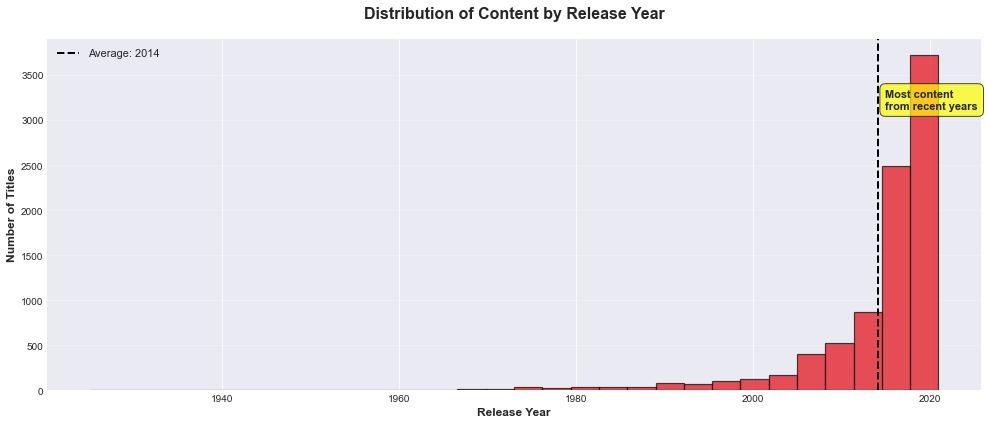

✅ Saved: viz_06_release_year_distribution.png



In [17]:
# ============================================================================
# VISUALIZATION 6: Content Age Distribution (Histogram)
# ============================================================================
print("Creating Visualization 6: Content Age Distribution...")

plt.figure(figsize=(14, 6))

# Create histogram for release years
plt.hist(df_clean['release_year'], 
         bins=30, 
         color='#E50914', 
         edgecolor='black', 
         linewidth=1.2,
         alpha=0.7)

plt.xlabel('Release Year', fontsize=12, fontweight='bold')
plt.ylabel('Number of Titles', fontsize=12, fontweight='bold')
plt.title('Distribution of Content by Release Year', fontsize=16, fontweight='bold', pad=20)

# Add vertical line for mean
mean_year = df_clean['release_year'].mean()
plt.axvline(mean_year, color='black', linestyle='--', linewidth=2, 
            label=f'Average: {mean_year:.0f}')

# Add annotation
plt.annotate(f'Most content\nfrom recent years',
             xy=(2015, plt.ylim()[1]*0.8),
             fontsize=11,
             fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('viz_06_release_year_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: viz_06_release_year_distribution.png")
print()

Creating Visualization 7: Content Type Trends Over Time...


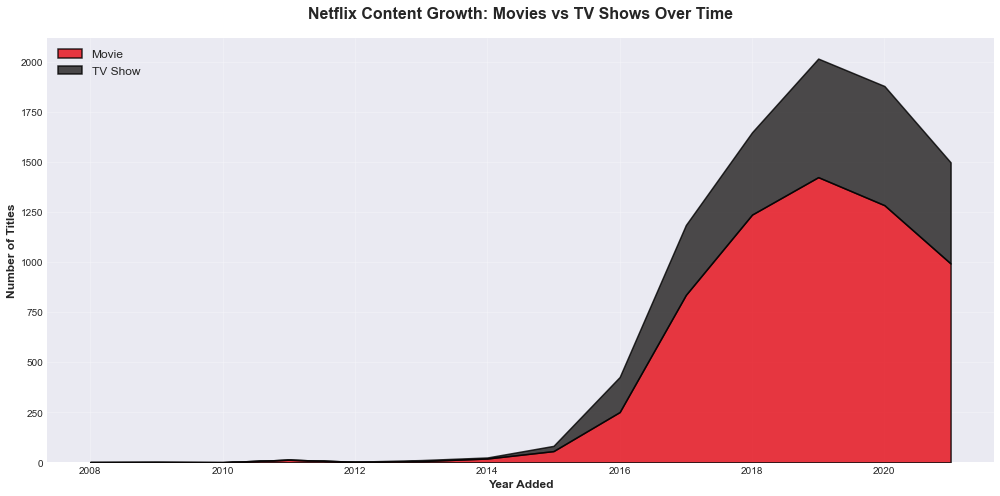

✅ Saved: viz_07_content_type_timeline.png



In [18]:
# ============================================================================
# VISUALIZATION 7: Movies vs TV Shows Added Over Time (Stacked Area)
# ============================================================================

print("Creating Visualization 7: Content Type Trends Over Time...")

plt.figure(figsize=(14, 7))

# Get yearly counts by type
type_by_year = df_clean.groupby(['year_added', 'type']).size().unstack(fill_value=0)

# Create stacked area chart
plt.stackplot(type_by_year.index, 
              type_by_year['Movie'], 
              type_by_year['TV Show'],
              labels=['Movie', 'TV Show'],
              colors=['#E50914', '#221f1f'],
              alpha=0.8,
              edgecolor='black',
              linewidth=1.5)

plt.xlabel('Year Added', fontsize=12, fontweight='bold')
plt.ylabel('Number of Titles', fontsize=12, fontweight='bold')
plt.title('Netflix Content Growth: Movies vs TV Shows Over Time', 
          fontsize=16, fontweight='bold', pad=20)

plt.legend(loc='upper left', fontsize=12, framealpha=0.9)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('viz_07_content_type_timeline.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: viz_07_content_type_timeline.png")
print()

Creating Vizualization 8: Heatmap of Ratings over time...


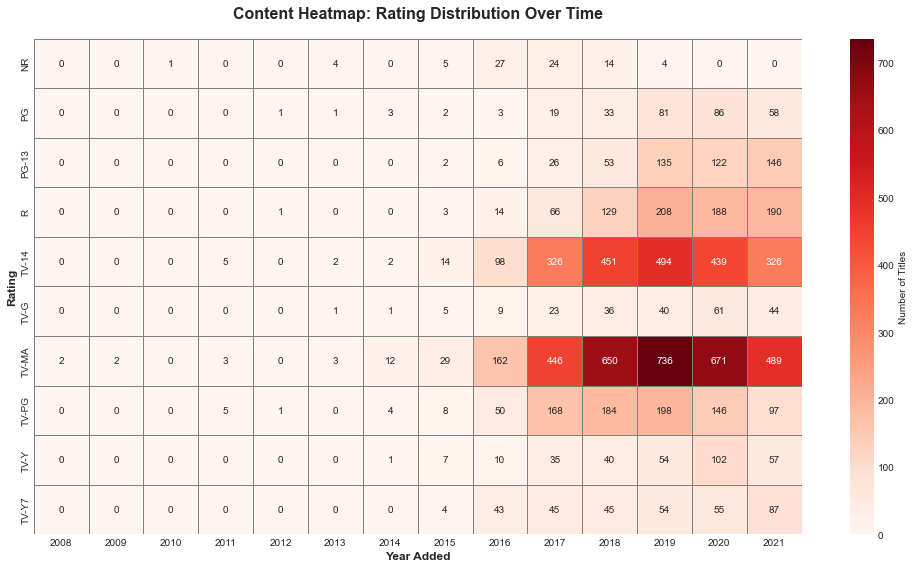

Saved: viz_08_rating_year_heatmap.png



In [19]:
# ============================================================================
# VISUALIZATION 8: Heatmap - Top Ratings Over Time
# ============================================================================

print('Creating Vizualization 8: Heatmap of Ratings over time...')

plt.figure(figsize = (14,8))

top_ratings = df_clean['rating'].value_counts().head(10).index
df_top = df_clean[df_clean['rating'].isin(top_ratings)]

heatmap_data = df_top.pivot_table(values = 'show_id', index = 'rating', columns = 'year_added', aggfunc = 'count', fill_value = 0)

sns.heatmap(heatmap_data, annot = True, fmt = 'g', cmap = 'Reds', linewidth = 0.5, linecolor = 'gray', cbar_kws = {'label':'Number of Titles'}, vmin = 0)

plt.title('Content Heatmap: Rating Distribution Over Time', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year Added', fontsize=12, fontweight='bold')
plt.ylabel('Rating', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('viz_08_rating_year_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: viz_08_rating_year_heatmap.png")
print()

Creating Visualization 9: Movie Duration Analysis...


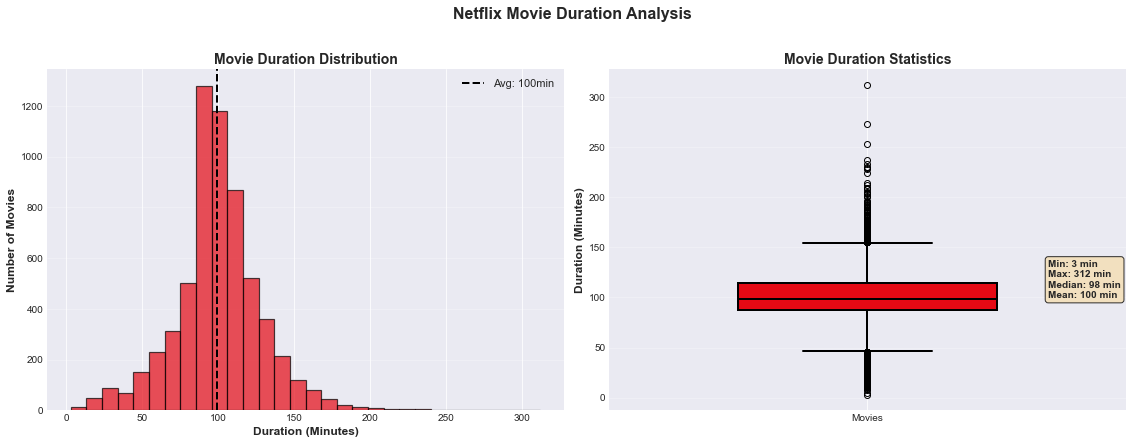

Saved: viz_09_movie_duration.png

 Movie Duration Stats:
   Average: 99.6 minutes
   Median: 98 minutes
   Range: 3 - 312 minutes



In [20]:
# ============================================================================
# VISUALIZATION 9: Movie Duration Distribution
# ============================================================================

print('Creating Visualization 9: Movie Duration Analysis...')

movies_df = df_clean[df_clean['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(int)

fig,axes = plt.subplots(1,2,figsize = (16,6))

axes[0].hist(movies_df['duration_minutes'],
            bins = 30,
            color = '#E50914',
            edgecolor = 'black',
            linewidth = 1.2,
            alpha = 0.7)

axes[0].set_xlabel('Duration (Minutes)', fontsize = 12, fontweight = 'bold')
axes[0].set_ylabel('Number of Movies', fontsize = 12, fontweight = 'bold')
axes[0].set_title('Movie Duration Distribution', fontsize = 14, fontweight = 'bold')
axes[0].axvline(movies_df['duration_minutes'].mean(),
               color = 'black', linestyle = '--', linewidth = 2,
               label = f"Avg: {movies_df['duration_minutes'].mean():.0f}min")
axes[0].legend(fontsize = 11)
axes[0].grid(axis='y',alpha = 0.3)

box = axes[1].boxplot(movies_df['duration_minutes'], 
                     vert = True,
                     patch_artist = True,
                     widths = 0.5)

for patch in box['boxes']:
    patch.set_facecolor('#E50914')
    patch.set_edgecolor('black')
    patch.set_linewidth(2)
    
for element in ['whiskers','fliers','means','medians','caps']:
    plt.setp(box[element], color ='black', linewidth = 2)
    
axes[1].set_ylabel('Duration (Minutes)', fontsize=12, fontweight='bold')
axes[1].set_title('Movie Duration Statistics', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['Movies'])
axes[1].grid(axis='y', alpha=0.3)

# Add statistics text
stats_text = f"Min: {movies_df['duration_minutes'].min()} min\n"
stats_text += f"Max: {movies_df['duration_minutes'].max()} min\n"
stats_text += f"Median: {movies_df['duration_minutes'].median():.0f} min\n"
stats_text += f"Mean: {movies_df['duration_minutes'].mean():.0f} min"

axes[1].text(1.35, movies_df['duration_minutes'].mean(), stats_text,
             fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.suptitle('Netflix Movie Duration Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('viz_09_movie_duration.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: viz_09_movie_duration.png")
print(f"\n Movie Duration Stats:")
print(f"   Average: {movies_df['duration_minutes'].mean():.1f} minutes")
print(f"   Median: {movies_df['duration_minutes'].median():.0f} minutes")
print(f"   Range: {movies_df['duration_minutes'].min()} - {movies_df['duration_minutes'].max()} minutes")
print()

Fixing Pillow compatibility issue...
📦 Upgrading Pillow library...
✅ Pillow upgraded!

⚠️  IMPORTANT: You need to RESTART your Jupyter kernel now!
   1. Click 'Kernel' in the menu
   2. Click 'Restart'
   3. Re-run all cells up to this point
   4. Then run the word cloud code below



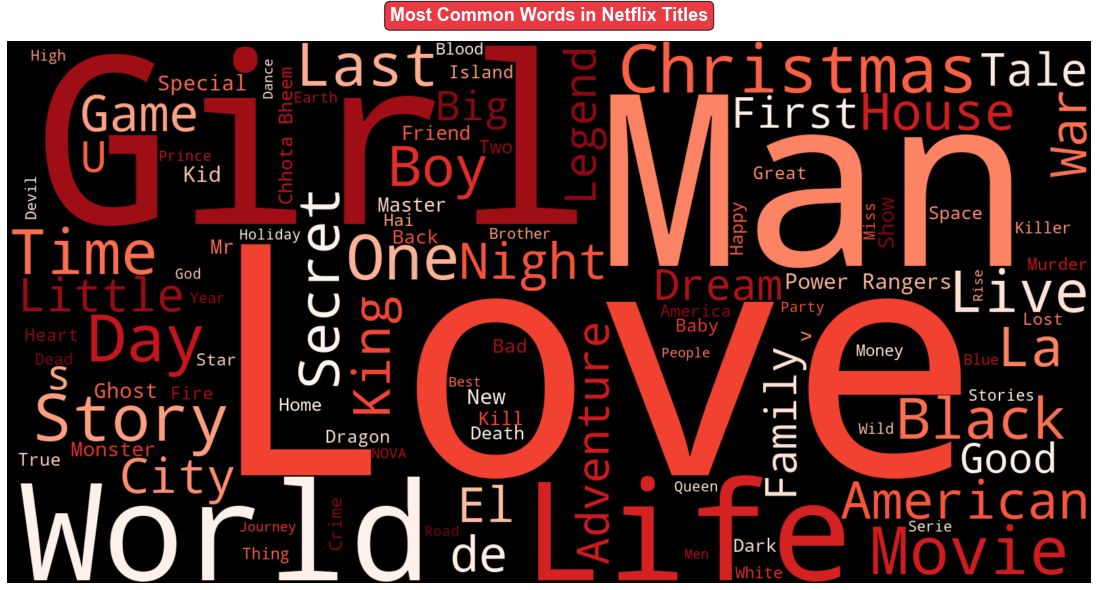

✅ Saved: viz_10_title_wordcloud.png



In [21]:
# ============================================================================
# VISUALIZATION 10: Word Cloud - Fix Pillow Version
# ============================================================================

print("Fixing Pillow compatibility issue...")

import subprocess
import sys

# Upgrade Pillow to fix the font issue
try:
    print("Upgrading Pillow library...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", "Pillow"])
    print("Pillow upgraded!")
    print("\nIMPORTANT: You need to RESTART your Jupyter kernel now!")
    print("   1. Click 'Kernel' in the menu")
    print("   2. Click 'Restart'")
    print("   3. Re-run all cells up to this point")
    print("   4. Then run the word cloud code below")
    print()
except Exception as e:
    print(f"Error: {e}")

# ============================================================================
# AFTER RESTARTING KERNEL, RUN THIS:
# ============================================================================

from wordcloud import WordCloud

# Combine all titles into one string
all_titles = ' '.join(df_clean['title'].values)

# Create word cloud with simpler settings
wordcloud = WordCloud(
    width=1600, 
    height=800,
    background_color='black',
    colormap='Reds',
    max_words=100
).generate(all_titles)

# Plot
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', 
          fontsize=18, fontweight='bold', color='white', 
          pad=20, bbox=dict(boxstyle='round', facecolor='#E50914', alpha=0.8))
plt.tight_layout(pad=0)
plt.savefig('viz_10_title_wordcloud.png', dpi=300, bbox_inches='tight', facecolor='black')
plt.show()

print("Saved: viz_10_title_wordcloud.png")
print()

In [26]:
# ============================================================================
# MACHINE LEARNING - Predicting Content Type (Movie vs TV Show)
# ============================================================================
print("\n" + "="*70)
print("🤖 BUILDING MACHINE LEARNING MODEL")
print("="*70)
print()
print('ML libraries imported!')

print()

# ============================================================================
# STEP 1: Feature Engineering
# ============================================================================
print('Step 1: Feature Engineering')
print('-'*70)

#Create a copy for ML
df_ml = df_clean.copy()

#Feature 1: Release year
df_ml['feature_release_year'] = df_ml['release_year']

#Feature 2: Year added
df_ml['feature_year_added'] = df_ml['year_added']

#Feature 3: Rating encoded
le_rating = LabelEncoder()
df_ml['feature_rating'] = le_rating.fit_transform(df_ml['rating'])

#Feature 4: Has director info (1 if known, 0 if unknown)
df_ml['feature_has_director'] = (df_ml['director'] != 'Unknown Director').astype(int)

#Feature 5: Country is US (1 if US, 0 otherwise)
df_ml['feature_is_us'] = df_ml['country'].str.contains('United States', na = False).astype(int)

#Feature 6: Title length (number of characters)
df_ml['feature_title_length'] = df_ml['title'].str.len()

#Target variable: Type (Movie = 1, TV Show = 0)
df_ml['target'] = (df_ml['type'] == 'Movie').astype(int)


print('Features created:')
print(' -Release year')
print(' -Year added')
print(' -Rating (encoded)')
print(' -Has director info')
print(' -Is US content')
print(' -Title length')
print()
print(f"Target variable: Movie=1, TV Show = 0")

print("Sample of engineered features:")
feature_cols = ['feature_release_year', 'feature_year_added','feature_rating', 
               'feature_has_director', 'feature_is_us','feature_title_length',
               'target']

print(df_ml[feature_cols].head())
print()


🤖 BUILDING MACHINE LEARNING MODEL

ML libraries imported!

Step 1: Feature Engineering
----------------------------------------------------------------------
Features created:
 -Release year
 -Year added
 -Rating (encoded)
 -Has director info
 -Is US content
 -Title length

Target variable: Movie=1, TV Show = 0
Sample of engineered features:
   feature_release_year  feature_year_added  feature_rating  \
0                  2020                2021               4   
1                  2021                2021               8   
2                  2021                2021               8   
3                  2021                2021               8   
4                  2021                2021               8   

   feature_has_director  feature_is_us  feature_title_length  target  
0                     1              1                    20       1  
1                     0              0                    13       0  
2                     1              0                     9   

In [29]:
# ============================================================================
# STEP 2: Prepare Data and Train Model
# ============================================================================

print('Step 2: Train/Test Split and Model Training')
print('='*70)

#Select features
X = df_ml[['feature_release_year','feature_year_added','feature_rating',
          'feature_has_director','feature_is_us','feature_title_length']]
y = df_ml['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print()


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42, stratify = y)

print(f"Training set: {X_train.shape[0]:,} samples")
print(f"Test set: {X_test.shape[0]:,} samples")
print()

print("Training Random Forest model...")
model = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 42, n_jobs = 1)

model.fit(X_train, y_train)
print("Model trained successfully!")
print()


# ============================================================================
# STEP 3: Make Predictions and Evaluate
# ============================================================================

print("Step 3: Model Evaluation")
print("="*70)

#Predictions
y_pred = model.predict(X_test)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Step 2: Train/Test Split and Model Training
Features shape: (8790, 6)
Target shape: (8790,)

Training set: 7,032 samples
Test set: 1,758 samples

Training Random Forest model...
Model trained successfully!

Step 3: Model Evaluation
Model Accuracy: 95.34%


In [30]:
print("Detailed Classification Report:")
print(classification_report(y_test, y_pred, target_names = ['TV Show','Movie']))
print()

Detailed Classification Report:
              precision    recall  f1-score   support

     TV Show       0.94      0.90      0.92       533
       Movie       0.96      0.98      0.97      1225

    accuracy                           0.95      1758
   macro avg       0.95      0.94      0.94      1758
weighted avg       0.95      0.95      0.95      1758




In [31]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print()

Confusion Matrix:
[[ 481   52]
 [  30 1195]]



In [32]:
feature_importance = pd.DataFrame({
    'Feature':X.columns,
    'Importance':model.feature_importances_
}).sort_values('Importance',ascending=False)

In [33]:
print("Feature Importance (what matters most?):")
print(feature_importance.to_string(index=False))
print()

Feature Importance (what matters most?):
             Feature  Importance
feature_has_director    0.819560
      feature_rating    0.070298
feature_title_length    0.053459
feature_release_year    0.037532
  feature_year_added    0.013059
       feature_is_us    0.006092



In [35]:
# Need to check for overfitting, because model accuracy is too high 
print('='*70)
print('Overfitting Analysis')
print('='*70)
print()

#Check training accuracy vs test accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print('Accuracy Comparison:')
print('='*70)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Difference: {(train_accuracy-test_accuracy)*100:.2f}%")
print()


#Rule of Thumb: If training >> test (like 99% vs 95%), its overfitting
if train_accuracy - test_accuracy > 0.05:
    print("Warning: Possible overfitting detected!")
    print(" Training accuracy is significantly higher than test accuracy")
else: 
    print(" Model looks good! No significant overfitting detected")
    print(" Training and test accuracy are close")
    
print()

Overfitting Analysis

Accuracy Comparison:
Training Accuracy: 96.25%
Test Accuracy: 95.34%
Difference: 0.91%

 Model looks good! No significant overfitting detected
 Training and test accuracy are close



In [36]:
# ============================================================================
# WHY IS ACCURACY SO HIGH? Let's investigate
# ============================================================================

print("="*70)
print("🤔 WHY IS ACCURACY SO HIGH?")
print("="*70)
print()

#Check class distribution
print("Class Distribution in Dataset:")
print(y.value_counts())
print()
print("As percentages:")
print(y.value_counts(normalize=True)*100)
print()

#Check if features are highly correlated with target
print("Let's see how well each feature seperates Movies vs TV Shows:")
print("="*70)

#Group by target and show mean of each feature
feature_comparison = df_ml.groupby('target')[
    ['feature_release_year','feature_year_added','feature_rating',
    'feature_has_director','feature_is_us','feature_title_length']
].mean()

🤔 WHY IS ACCURACY SO HIGH?

Class Distribution in Dataset:
1    6126
0    2664
Name: target, dtype: int64

As percentages:
1    69.692833
0    30.307167
Name: target, dtype: float64

Let's see how well each feature seperates Movies vs TV Shows:


In [37]:
feature_comparison.index = ['TV Show','Movie']
print(feature_comparison)
print()

         feature_release_year  feature_year_added  feature_rating  \
TV Show           2016.627628         2018.925300        7.877252   
Movie             2013.120144         2018.851126        6.643324   

         feature_has_director  feature_is_us  feature_title_length  
TV Show              0.086336       0.349850             17.025150  
Movie                0.969474       0.448743             18.019915  



In [38]:
print("Interpolating:")
print("="*70)
print("""
If the 95% accuracy is real (not overfitting):
1) It means Movies and TV Shows have VERY different characteristics
2) The features we chose are highly predictive
3) This is actually a relatively easy classification problem

Common reasons for high accuracy:
1) Movies and TV Shows ARE fundamentally different (different ratings, years, etc.)
2) Our features capture these differences well
3) Random Forest is a powerful algorithm

To verify its not overfitting: 
1) Training and test accuracy should be close (within 2-5%)
2) If training is 99% and test is 95% thats ok
3) If training is 100% and test is 70%, thats BAD
""")

Interpolating:

If the 95% accuracy is real (not overfitting):
1) It means Movies and TV Shows have VERY different characteristics
2) The features we chose are highly predictive
3) This is actually a relatively easy classification problem

Common reasons for high accuracy:
1) Movies and TV Shows ARE fundamentally different (different ratings, years, etc.)
2) Our features capture these differences well
3) Random Forest is a powerful algorithm

To verify its not overfitting: 
1) Training and test accuracy should be close (within 2-5%)
2) If training is 99% and test is 95% thats ok
3) If training is 100% and test is 70%, thats BAD



Creating Visualization 11: ML Model Performance...


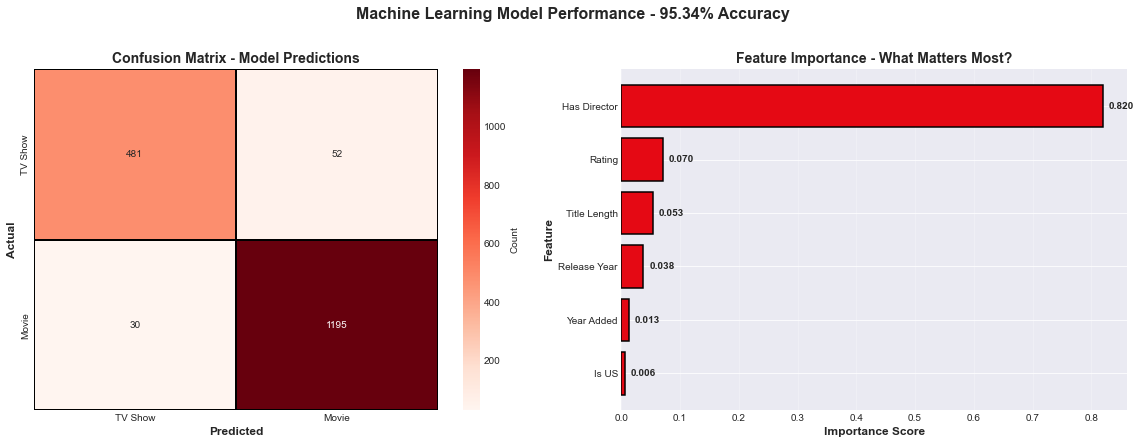

✅ Saved: viz_11_ml_model_performance.png



In [41]:
# ============================================================================
# VISUALIZATION 11: Model Performance Visualization
# ============================================================================

print("Creating Visualization 11: ML Model Performance...")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ============================================================================
# Plot 1: Confusion Matrix Heatmap
# ============================================================================
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['TV Show', 'Movie'],
            yticklabels=['TV Show', 'Movie'],
            cbar_kws={'label': 'Count'},
            linewidths=2, linecolor='black',
            ax=axes[0])

axes[0].set_xlabel('Predicted', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=12, fontweight='bold')
axes[0].set_title('Confusion Matrix - Model Predictions', fontsize=14, fontweight='bold')

# ============================================================================
# Plot 2: Feature Importance
# ============================================================================

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': ['Release Year', 'Year Added', 'Rating', 'Has Director', 'Is US', 'Title Length'],
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=True)

# Plot horizontal bar
bars = axes[1].barh(feature_importance['Feature'], 
                    feature_importance['Importance'],
                    color='#E50914',
                    edgecolor='black',
                    linewidth=1.5)

axes[1].set_xlabel('Importance Score', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Feature', fontsize=12, fontweight='bold')
axes[1].set_title('Feature Importance - What Matters Most?', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[1].text(width + 0.01, bar.get_y() + bar.get_height()/2.,
                 f'{width:.3f}',
                 ha='left', va='center', fontweight='bold', fontsize=10)

# Overall title
plt.suptitle(f'Machine Learning Model Performance - {accuracy*100:.2f}% Accuracy', 
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('viz_11_ml_model_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Saved: viz_11_ml_model_performance.png")
print()

